# 1.读取数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

In [2]:
#读取LC数据表，LC为标的特征表
LC = pd.read_csv('D:\DataSet\ppdai_3_23\LC.csv')
#读取LP数据表，LP为标的还款计划和还款记录表
LP = pd.read_csv('D:\DataSet\ppdai_3_23\LP.csv')

In [3]:
LC.head()

,ListingId,借款金额,借款期限,借款利率,借款成功日期,初始评级,借款类型,是否首标,年龄,性别,...,户口认证,视频认证,学历认证,征信认证,淘宝认证,历史成功借款次数,历史成功借款金额,总待还本金,历史正常还款期数,历史逾期还款期数
0,126541,18000,12,18.0,2015-05-04,C,其他,否,35,男,...,未成功认证,成功认证,未成功认证,未成功认证,未成功认证,11,40326.0,8712.73,57,16
1,133291,9453,12,20.0,2015-03-16,D,其他,否,34,男,...,成功认证,未成功认证,未成功认证,未成功认证,未成功认证,4,14500.0,7890.64,13,1
2,142421,27000,24,20.0,2016-04-26,E,普通,否,41,男,...,未成功认证,未成功认证,未成功认证,未成功认证,未成功认证,5,21894.0,11726.32,25,3
3,149711,25000,12,18.0,2015-03-30,C,其他,否,34,男,...,成功认证,成功认证,未成功认证,未成功认证,未成功认证,6,36190.0,9703.41,41,1
4,152141,20000,6,16.0,2015-01-22,C,电商,否,24,男,...,成功认证,成功认证,未成功认证,未成功认证,未成功认证,13,77945.0,0.00,118,14


In [4]:
LP.head()

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22
2,126541,3,1,1421.95,228.28,0.0,0.0,2015-08-04,2015-08-04,2017-02-22
3,126541,4,1,1443.28,206.95,0.0,0.0,2015-09-04,2015-09-04,2017-02-22
4,126541,5,1,1464.93,185.30,0.0,0.0,2015-10-04,2015-10-04,2017-02-22


# 2.数据预处理

In [5]:
#查看LC数据集的信息
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 21 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ListingId  328553 non-null  int64  
 1   借款金额       328553 non-null  int64  
 2   借款期限       328553 non-null  int64  
 3   借款利率       328553 non-null  float64
 4   借款成功日期     328553 non-null  object 
 5   初始评级       328553 non-null  object 
 6   借款类型       328553 non-null  object 
 7   是否首标       328553 non-null  object 
 8   年龄         328553 non-null  int64  
 9   性别         328553 non-null  object 
 10  手机认证       328553 non-null  object 
 11  户口认证       328553 non-null  object 
 12  视频认证       328553 non-null  object 
 13  学历认证       328553 non-null  object 
 14  征信认证       328553 non-null  object 
 15  淘宝认证       328553 non-null  object 
 16  历史成功借款次数   328553 non-null  int64  
 17  历史成功借款金额   328553 non-null  float64
 18  总待还本金      328553 non-null  float64
 19  历史正常还款期数   328553 non-n

In [6]:
#查看LP数据集的信息
LP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ListingId   int64  
 1   期数          int64  
 2   还款状态        int64  
 3   应还本金        float64
 4   应还利息        float64
 5   剩余本金        float64
 6   剩余利息        float64
 7   到期日期        object 
 8   还款日期        object 
 9   recorddate  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB


In [7]:
#缺失值的处理
(LC.isnull()).sum()

ListingId    0
借款金额         0
借款期限         0
借款利率         0
借款成功日期       0
初始评级         0
借款类型         0
是否首标         0
年龄           0
性别           0
手机认证         0
户口认证         0
视频认证         0
学历认证         0
征信认证         0
淘宝认证         0
历史成功借款次数     0
历史成功借款金额     0
总待还本金        0
历史正常还款期数     0
历史逾期还款期数     0
dtype: int64

In [8]:
(LP.isnull()).sum()

ListingId     0
期数            0
还款状态          0
应还本金          0
应还利息          0
剩余本金          0
剩余利息          0
到期日期          0
还款日期          0
recorddate    0
dtype: int64

In [9]:
#重复值的处理
(LC.duplicated()).sum()

0

In [10]:
#(LP.duplicated()).sum()

# 3.借款金额的分析

分析不同性别、不同学历、不同年龄段的客户之间以及新旧客户之间的借款金额情况的分析

## 3.1 不同性别的用户的借款金额分析

In [11]:
male_data = LC[LC['性别']=='男']
female_data = LC[LC['性别']=='女']

In [12]:
#男女用户借款总金额
sex_data = (male_data['借款金额'].sum(),female_data['借款金额'].sum())

In [13]:
sex_data

(1001329390, 452128926)

In [14]:
sex_id = ('男','女')

([<matplotlib.patches.Wedge at 0x90e5a90>,
 [Text(-0.6152268248749628, 0.9118639997029557, '男'),
  Text(0.6152269102498288, -0.9118639421012597, '女')],
 [Text(-0.335578268113616, 0.49738036347433945, '68.9%'),
  Text(0.3355783146817247, -0.49738033205523247, '31.1%')])

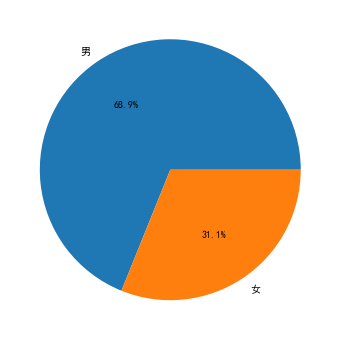

In [15]:
plt.figure(figsize=(12, 6))
plt.pie(sex_data,labels=sex_id,autopct='%.1f%%')

## 3.2 新旧客户的借款金额分析

In [16]:
#新老客户与借款金额之间的关系
LC['是否首标'].value_counts()

否    241090
是     87463
Name: 是否首标, dtype: int64

In [17]:
new_custom = LC[LC['是否首标']=='是']
old_custom = LC[LC['是否首标']=='否']
nocus_data = (new_custom['借款金额'].sum(),old_custom['借款金额'].sum())
nocus_id = ('新用户','老用户')

Text(0.5, 1.0, '新老用户借款金额')

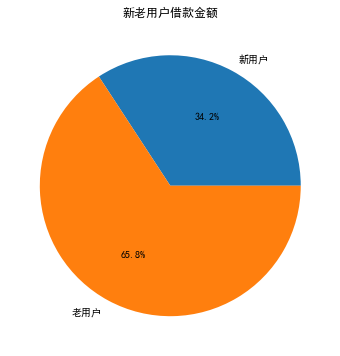

In [18]:
plt.figure(figsize=(9, 6))
plt.pie(nocus_data,labels=nocus_id,autopct='%.1f%%')
plt.title('新老用户借款金额')

## 3.3 不同学历的客户的借款金额分析

In [19]:
un_edu = LC[LC['学历认证']=='未成功认证']
edu = LC[LC['学历认证']=='成功认证']
edu_data = (un_edu['借款金额'].sum(),edu['借款金额'].sum())
edu_id = ('学历未认证成功','学历认证成功')

Text(0.5, 1.0, '不同学历借款金额')

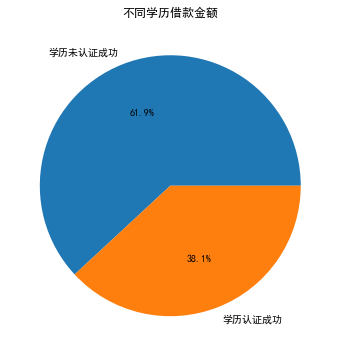

In [20]:
plt.figure(figsize=(9, 6))
plt.pie(edu_data,labels=edu_id,autopct='%.1f%%')
plt.title('不同学历借款金额')

## 3.4 不同年龄段的客户的借款金额分析

In [21]:
#首先，对年龄进行分段
LC['age_bin'] = pd.cut(LC['年龄'],[15,20,25,30,35,40,45,50,55],right=True)

In [22]:
LC['age_bin'].value_counts()

(25, 30]    108110
(20, 25]     97634
(30, 35]     58499
(35, 40]     27386
(40, 45]     15488
(15, 20]     12348
(45, 50]      7238
(50, 55]      1794
Name: age_bin, dtype: int64

In [23]:
#以年龄分段建立数据透视表
lc_age = pd.pivot_table(data=LC,index='age_bin',
                      values='借款金额',aggfunc=np.sum)

In [24]:
lc_age

,借款金额
age_bin,
"(15, 20]",19935526
"(20, 25]",340620032
"(25, 30]",496059668
"(30, 35]",306972341
"(35, 40]",153548260
"(40, 45]",85861895
"(45, 50]",37759702
"(50, 55]",11397750


In [25]:
lc_age.rename(columns={'借款金额':'借款总金额'},inplace=True)

In [26]:
lc_age

,借款总金额
age_bin,
"(15, 20]",19935526
"(20, 25]",340620032
"(25, 30]",496059668
"(30, 35]",306972341
"(35, 40]",153548260
"(40, 45]",85861895
"(45, 50]",37759702
"(50, 55]",11397750


Text(0.5, 1.0, '不同年龄段借款金额')

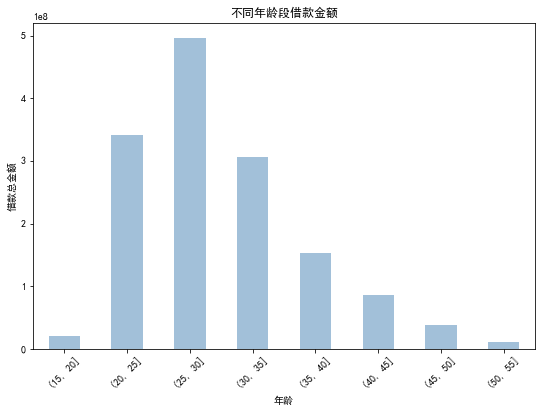

In [27]:
plt.figure(figsize=(9,6))

lc_age['借款总金额'].plot(kind='bar',rot=45,color='steelblue',alpha=0.5)
plt.xlabel('年龄')
plt.ylabel('借款总金额')
plt.title('不同年龄段借款金额')

## 3.5 结论  
通过以上的分析可以得出结论：  
    1.男性顾客贡献的贷款金额达到了69%，其原因可能是因为男性更加倾向于提前消费且消费金额较大  
    2.老用户的贷款金额达到了66%，这说明用户倾向于多次使用这个产品，产品粘性较高  
    3.学历未成功认证的人贷款金额较多  
    4.年龄段在25-30岁之间的借款金额最多，而20-35岁的人群占比超过75%，是该产品的主力消费人群  

# 4 资金储备的分析
主要是看看公司自2015年1月1日起，每日借款金额的走势以及每月借款金额的走势

In [28]:
LC['借款成功日期'].head(10)

0    2015-05-04
1    2015-03-16
2    2016-04-26
3    2015-03-30
4    2015-01-22
5    2015-03-25
6    2015-06-26
7    2016-03-19
8    2015-03-21
9    2015-04-15
Name: 借款成功日期, dtype: object

In [29]:
#导入时间处理模块
from datetime import datetime


In [30]:
loan = LC[['借款成功日期','借款金额']].copy()

In [31]:
loan.head()

,借款成功日期,借款金额
0,2015-05-04,18000
1,2015-03-16,9453
2,2016-04-26,27000
3,2015-03-30,25000
4,2015-01-22,20000


In [32]:
loan['借款日期'] = pd.to_datetime(loan['借款成功日期'])

In [33]:
loan.head(10)

,借款成功日期,借款金额,借款日期
0,2015-05-04,18000,2015-05-04
1,2015-03-16,9453,2015-03-16
2,2016-04-26,27000,2016-04-26
3,2015-03-30,25000,2015-03-30
4,2015-01-22,20000,2015-01-22
5,2015-03-25,20000,2015-03-25
6,2015-06-26,3940,2015-06-26
7,2016-03-19,20000,2016-03-19
8,2015-03-21,25000,2015-03-21
9,2015-04-15,10475,2015-04-15


In [34]:
loan_pivot = loan.pivot_table(index='借款日期', aggfunc='sum').copy()

In [35]:
loan_pivot

,借款金额
借款日期,
2015-01-01,49473
2015-01-02,61273
2015-01-03,413384
2015-01-04,651165
2015-01-05,249614
...,...
2017-01-26,6119649
2017-01-27,2772905
2017-01-28,2103364


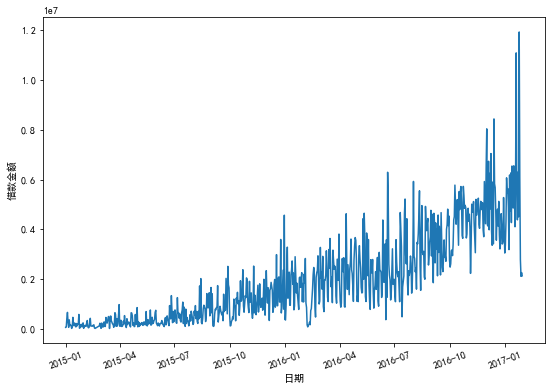

In [36]:
#将每一天的借款金额的走势
plt.figure(figsize=(9,6))
plt.plot(loan_pivot)
plt.xticks(rotation=20)
plt.xlabel('日期')
plt.ylabel('借款金额')
plt.show()

In [37]:
#分析每月贷款金额的走势
loan['借款成功月份'] = [datetime.strftime(x, '%Y-%m') for x in loan['借款日期']]

In [38]:
loan.head()

,借款成功日期,借款金额,借款日期,借款成功月份
0,2015-05-04,18000,2015-05-04,2015-05
1,2015-03-16,9453,2015-03-16,2015-03
2,2016-04-26,27000,2016-04-26,2016-04
3,2015-03-30,25000,2015-03-30,2015-03
4,2015-01-22,20000,2015-01-22,2015-01


In [39]:
loan_pivot_m = loan.pivot_table(index='借款成功月份', aggfunc='sum').copy()

In [40]:
loan_pivot_m.head()

,借款金额
借款成功月份,
2015-01,5495048
2015-02,2974525
2015-03,8678800
2015-04,8075770
2015-05,8430741


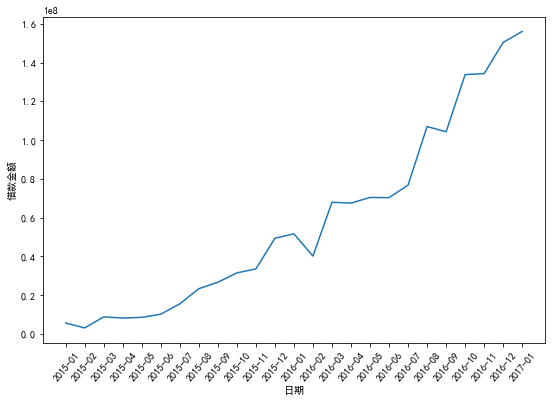

In [41]:
#将每月的借款金额走势图
plt.figure(figsize=(9,6))
plt.plot(loan_pivot_m)
plt.xticks(rotation=50)
plt.xlabel('日期')
plt.ylabel('借款金额')
plt.show()

## 结论

通过以上的分析可以得出：

1.每日贷款金额呈现的是一个往上的趋势,但是每天的波动较大。

2.每月贷款分析结论：从2015年1月到2017年1月，月度贷款金额呈现上升趋势，上升速度随着时间增快。

3.2017年1月每日的借款金额达到5204664元，标准差为2203394。
  根据3σ原则，想使每日借款金额充足的概率达到99.9%，则每日公式账上需准备5204664+2203394×3=11814846元。

# 5 逾期还款率的分析

逾期还款率 = 历史逾期还款期数 / (历史逾期还款期数 + 历史正常还款期数)

分析借款人的初始评级、借款类型、性别、年龄、借款金额等特征对客户逾期还款的影响

In [42]:
LC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328553 entries, 0 to 328552
Data columns (total 22 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   ListingId  328553 non-null  int64   
 1   借款金额       328553 non-null  int64   
 2   借款期限       328553 non-null  int64   
 3   借款利率       328553 non-null  float64 
 4   借款成功日期     328553 non-null  object  
 5   初始评级       328553 non-null  object  
 6   借款类型       328553 non-null  object  
 7   是否首标       328553 non-null  object  
 8   年龄         328553 non-null  int64   
 9   性别         328553 non-null  object  
 10  手机认证       328553 non-null  object  
 11  户口认证       328553 non-null  object  
 12  视频认证       328553 non-null  object  
 13  学历认证       328553 non-null  object  
 14  征信认证       328553 non-null  object  
 15  淘宝认证       328553 non-null  object  
 16  历史成功借款次数   328553 non-null  int64   
 17  历史成功借款金额   328553 non-null  float64 
 18  总待还本金      328553 non-null  float64 
 19  历史

## 5.1 不同初始评级的客户的逾期还款率

In [43]:
LC['初始评级'].value_counts()

D    134860
C    131705
B     33188
E     17027
A     10284
F      1489
Name: 初始评级, dtype: int64

In [44]:
LC['逾期还款率'] = LC['历史逾期还款期数']/(LC['历史正常还款期数']+LC['历史逾期还款期数'])

In [45]:
LC['逾期还款率'].head()

0    0.219178
1    0.071429
2    0.107143
3    0.023810
4    0.106061
Name: 逾期还款率, dtype: float64

In [46]:
#以初始评级建立数据透视表
level_pivot = pd.pivot_table(data=LC,index='初始评级',
                      values='逾期还款率')


In [47]:
level_pivot

,逾期还款率
初始评级,
A,0.012707
B,0.016051
C,0.033304
D,0.048976
E,0.132443
F,0.120375


<Figure size 648x432 with 0 Axes>

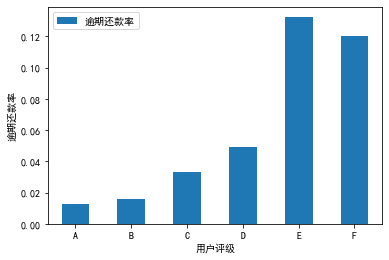

In [48]:
plt.figure(figsize=(9,6))
level_pivot.plot(kind='bar')
#plt.bar(level_pivot.index,level_pivot['逾期还款率'])
plt.xticks(rotation=0)
plt.xlabel('用户评级')
plt.ylabel('逾期还款率')
plt.show()

## 5.2 不同借款类型的客户的逾期还款率

In [49]:

LC['借款类型'].value_counts()

普通       118103
APP闪电    112079
其他        97302
电商         1069
Name: 借款类型, dtype: int64

In [50]:
type_pivot = pd.pivot_table(data=LC,index='借款类型',
                      values='逾期还款率')


In [51]:
type_pivot_2 = type_pivot.reindex(index=['普通','电商','APP闪电','其他'])

<Figure size 648x432 with 0 Axes>

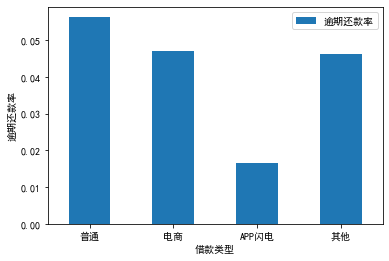

In [52]:
plt.figure(figsize=(9,6))
type_pivot_2.plot(kind='bar')
#plt.bar(type_pivot_2.index,type_pivot_2['逾期还款率'])
plt.xticks(rotation=0)
plt.xlabel('借款类型')
plt.ylabel('逾期还款率')
plt.show()

## 5.3 不同借款金额的客户的逾期还款率

In [53]:
LC['借款金额'].head()

0    18000
1     9453
2    27000
3    25000
4    20000
Name: 借款金额, dtype: int64

In [54]:
LC['借款金额'].max()

500000

In [55]:
LC['借款金额'].min()

100

In [56]:
LC['借款金额分段'] = pd.cut(LC['借款金额'],[0,2000,4000,6000,8000,10000,500000],right=True)

In [57]:
m_pivot = pd.pivot_table(data=LC,index='借款金额分段',
                        values='逾期还款率')

In [58]:
m_pivot

,逾期还款率
借款金额分段,
"(0, 2000]",0.024969
"(2000, 4000]",0.048083
"(4000, 6000]",0.040611
"(6000, 8000]",0.039812
"(8000, 10000]",0.038796
"(10000, 500000]",0.036084


<Figure size 648x432 with 0 Axes>

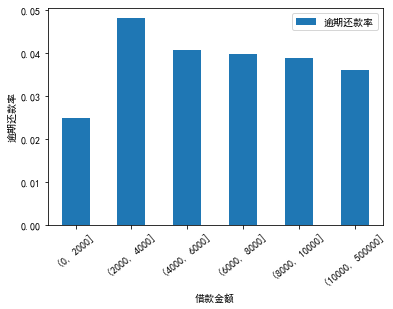

In [59]:
plt.figure(figsize=(9,6))
m_pivot.plot(kind='bar')
#plt.bar(m_pivot.index,m_pivot['逾期还款率'])
plt.xticks(rotation=40)
plt.xlabel('借款金额')
plt.ylabel('逾期还款率')
plt.show()

## 5.4 不同年龄客户的逾期还款率

In [60]:
y_pivot = pd.pivot_table(data=LC,index='age_bin',
                          values='逾期还款率')

In [61]:
y_pivot

,逾期还款率
age_bin,
"(15, 20]",0.015808
"(20, 25]",0.038715
"(25, 30]",0.040787
"(30, 35]",0.040270
"(35, 40]",0.038012
"(40, 45]",0.038571
"(45, 50]",0.042117
"(50, 55]",0.044917


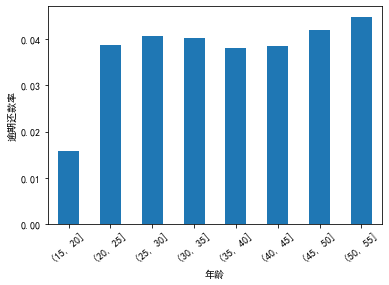

In [62]:
#plt.figure(figsize=(9,6))
y_pivot['逾期还款率'].plot(kind='bar')
plt.xticks(rotation=40)
plt.xlabel('年龄')
plt.ylabel('逾期还款率')
plt.show()

## 5.5 不同性别客户的逾期还款率

In [63]:
LC['性别'].value_counts()

男    221946
女    106607
Name: 性别, dtype: int64

In [64]:
sex_pivot = pd.pivot_table(data=LC,index='性别',
                          values='逾期还款率')

In [65]:
sex_pivot

,逾期还款率
性别,
女,0.046951
男,0.035478


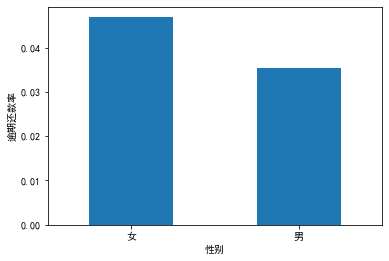

In [66]:
#plt.figure(figsize=(9,6))
sex_pivot['逾期还款率'].plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('性别')
plt.ylabel('逾期还款率')
plt.show()

## 5.6 结论

经过以上的分析得出：

1.初始评级对于贷款者的还款能力有比较好的预测作用，EF两级反转可能是因为样本数量较少，ABCD四个等级的平均逾期还款率都比较小，而EF两级明显增大，故公司对于这两类贷款者要谨慎对待。

2.年龄对于逾期率的分布较为平均，25-30岁的年轻人可以重点关注。

3.APP闪电的逾期还款率明显低于其他三种，故公司可以多考虑与“APP闪电”借款类型的合作。

4.女性的逾期率高于男性，可能是由于生活中男性收入较女性高造成的。

5.借款金额在2000以下的逾期还款率最低，2000-3000之间的最高。可以多考虑小额贷款降低逾期风险。

# 6 还款状态的分析

将LC、LP数据集合并，分析用户的还款状态

主要分析一下不同年龄段，不同性别，不同初始评级，不同借款类型、不同借款金额情况下用户的还款状态

还款状态有5种：0-‘未还款’，1-‘已正常还款’，2-‘已逾期还款’，3-‘已提前还清该标全部欠款’，4-‘已部分还款’

In [67]:
LP.head()

,ListingId,期数,还款状态,应还本金,应还利息,剩余本金,剩余利息,到期日期,还款日期,recorddate
0,126541,1,1,1380.23,270.00,0.0,0.0,2015-06-04,2015-06-04,2017-02-22
1,126541,2,1,1400.94,249.29,0.0,0.0,2015-07-04,2015-07-04,2017-02-22
2,126541,3,1,1421.95,228.28,0.0,0.0,2015-08-04,2015-08-04,2017-02-22
3,126541,4,1,1443.28,206.95,0.0,0.0,2015-09-04,2015-09-04,2017-02-22
4,126541,5,1,1464.93,185.30,0.0,0.0,2015-10-04,2015-10-04,2017-02-22


In [68]:
LP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203276 entries, 0 to 3203275
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ListingId   int64  
 1   期数          int64  
 2   还款状态        int64  
 3   应还本金        float64
 4   应还利息        float64
 5   剩余本金        float64
 6   剩余利息        float64
 7   到期日期        object 
 8   还款日期        object 
 9   recorddate  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 244.4+ MB


In [69]:
LP['还款状态'].value_counts()

0    1560671
1    1391092
2     212628
3      37805
4       1080
Name: 还款状态, dtype: int64

In [70]:
#把已经到期的记录提取出来
LP = LP[LP['到期日期'] <= LP['recorddate']]

In [71]:
LP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600898 entries, 0 to 3117188
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   ListingId   1600898 non-null  int64  
 1   期数          1600898 non-null  int64  
 2   还款状态        1600898 non-null  int64  
 3   应还本金        1600898 non-null  float64
 4   应还利息        1600898 non-null  float64
 5   剩余本金        1600898 non-null  float64
 6   剩余利息        1600898 non-null  float64
 7   到期日期        1600898 non-null  object 
 8   还款日期        1600898 non-null  object 
 9   recorddate  1600898 non-null  object 
dtypes: float64(4), int64(3), object(3)
memory usage: 134.4+ MB


In [72]:
LCLP = pd.merge(LC,LP,how='inner',on='ListingId')

In [73]:
LCLP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600898 entries, 0 to 1600897
Data columns (total 33 columns):
 #   Column      Non-Null Count    Dtype   
---  ------      --------------    -----   
 0   ListingId   1600898 non-null  int64   
 1   借款金额        1600898 non-null  int64   
 2   借款期限        1600898 non-null  int64   
 3   借款利率        1600898 non-null  float64 
 4   借款成功日期      1600898 non-null  object  
 5   初始评级        1600898 non-null  object  
 6   借款类型        1600898 non-null  object  
 7   是否首标        1600898 non-null  object  
 8   年龄          1600898 non-null  int64   
 9   性别          1600898 non-null  object  
 10  手机认证        1600898 non-null  object  
 11  户口认证        1600898 non-null  object  
 12  视频认证        1600898 non-null  object  
 13  学历认证        1600898 non-null  object  
 14  征信认证        1600898 non-null  object  
 15  淘宝认证        1600898 non-null  object  
 16  历史成功借款次数    1600898 non-null  int64   
 17  历史成功借款金额    1600898 non-null  float64 
 18  总待

In [74]:
LCLP.isnull().sum()

ListingId          0
借款金额               0
借款期限               0
借款利率               0
借款成功日期             0
初始评级               0
借款类型               0
是否首标               0
年龄                 0
性别                 0
手机认证               0
户口认证               0
视频认证               0
学历认证               0
征信认证               0
淘宝认证               0
历史成功借款次数           0
历史成功借款金额           0
总待还本金              0
历史正常还款期数           0
历史逾期还款期数           0
age_bin          263
逾期还款率         576939
借款金额分段             0
期数                 0
还款状态               0
应还本金               0
应还利息               0
剩余本金               0
剩余利息               0
到期日期               0
还款日期               0
recorddate         0
dtype: int64

In [75]:
LCLP.drop(['逾期还款率','age_bin'],axis=1,inplace=True)

In [76]:
(LCLP.isnull()).sum()

ListingId     0
借款金额          0
借款期限          0
借款利率          0
借款成功日期        0
初始评级          0
借款类型          0
是否首标          0
年龄            0
性别            0
手机认证          0
户口认证          0
视频认证          0
学历认证          0
征信认证          0
淘宝认证          0
历史成功借款次数      0
历史成功借款金额      0
总待还本金         0
历史正常还款期数      0
历史逾期还款期数      0
借款金额分段        0
期数            0
还款状态          0
应还本金          0
应还利息          0
剩余本金          0
剩余利息          0
到期日期          0
还款日期          0
recorddate    0
dtype: int64

## 6.1 不同性别的用户的还款状态分析

In [77]:
lclp_sex_pivot = pd.pivot_table(data=LCLP,columns='还款状态',index='性别',
                                values='ListingId',aggfunc=np.size)

In [78]:
lclp_sex_pivot

还款状态,0,1,2,3,4
性别,,,,,
女,12359,405347,63547,8714,235
男,40549,894929,149081,25293,844


In [79]:
lclp_sex_pivot.index

Index(['女', '男'], dtype='object', name='性别')

In [80]:
lclp_sex_pivot.columns = ['未还款','已正常还款','已逾期还款','已提前还清该标全部欠款','已部分还款']

In [81]:
lclp_sex_pivot

,未还款,已正常还款,已逾期还款,已提前还清该标全部欠款,已部分还款
性别,,,,,
女,12359,405347,63547,8714,235
男,40549,894929,149081,25293,844


In [82]:
a = lclp_sex_pivot['未还款']

In [83]:
a

性别
女    12359
男    40549
Name: 未还款, dtype: int64

In [84]:
lclp_sex_pivot.loc['女']

未还款             12359
已正常还款          405347
已逾期还款           63547
已提前还清该标全部欠款      8714
已部分还款             235
Name: 女, dtype: int64

In [85]:
lclp_sex_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 女 to 男
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   未还款          2 non-null      int64
 1   已正常还款        2 non-null      int64
 2   已逾期还款        2 non-null      int64
 3   已提前还清该标全部欠款  2 non-null      int64
 4   已部分还款        2 non-null      int64
dtypes: int64(5)
memory usage: 176.0+ bytes


In [86]:
lclp_sex_pivot.columns[3]

'已提前还清该标全部欠款'

In [87]:
lclp_sex_pivot

,未还款,已正常还款,已逾期还款,已提前还清该标全部欠款,已部分还款
性别,,,,,
女,12359,405347,63547,8714,235
男,40549,894929,149081,25293,844


In [88]:
#绘制堆叠柱状图
a_sex = lclp_sex_pivot['未还款']
b_sex = lclp_sex_pivot['已正常还款']
c_sex = lclp_sex_pivot['已逾期还款']
d_sex = lclp_sex_pivot['已提前还清该标全部欠款']
e_sex = lclp_sex_pivot['已部分还款']

In [89]:
labels = ['男','女']

In [90]:
range(len(a_sex))

range(0, 2)

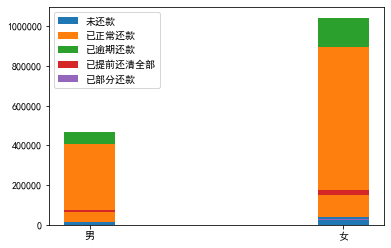

In [91]:
plt.bar(range(len(a_sex)),a_sex,tick_label=labels,label='未还款',width=0.2)
plt.bar(range(len(b_sex)),b_sex,bottom=a_sex,tick_label=labels,label='已正常还款',width=0.2)
plt.bar(range(len(c_sex)),c_sex,bottom=b_sex,tick_label=labels,label='已逾期还款',width=0.2)
plt.bar(range(len(d_sex)),d_sex,bottom=c_sex,tick_label=labels,label='已提前还清全部',width=0.2)
plt.bar(range(len(e_sex)),e_sex,bottom=d_sex,tick_label=labels,label='已部分还款',width=0.2)

plt.legend()
plt.show()

In [92]:
np.arange(len(a_sex))

array([0, 1])

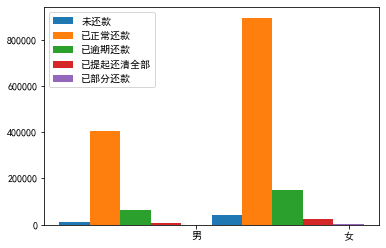

In [93]:
#绘制并列柱状图
width_0 = 0.2
plt.bar(np.arange(len(a_sex)),a_sex,tick_label=labels,label='未还款',width=0.2)
plt.bar(np.arange(len(b_sex))+width_0,b_sex,tick_label=labels,label='已正常还款',width=0.2)
plt.bar(np.arange(len(c_sex))+2*width_0,c_sex,tick_label=labels,label='已逾期还款',width=0.2)
plt.bar(np.arange(len(d_sex))+3*width_0,d_sex,tick_label=labels,label='已提起还清全部',width=0.2)
plt.bar(np.arange(len(e_sex))+4*width_0,e_sex,tick_label=labels,label='已部分还款',width=0.2)

plt.legend()
plt.show()

## 6.2 不同初始评级的用户的还款状态分析

In [94]:
#不同评级的用户的还款情况
LCLP['初始评级'].value_counts()

D    692424
C    575328
B    155961
E    119796
A     49021
F      8368
Name: 初始评级, dtype: int64

In [95]:
lclp_level_pivot = pd.pivot_table(data=LCLP,columns='还款状态',index='初始评级',
                                values='ListingId',aggfunc=np.size)

In [96]:
lclp_level_pivot

还款状态,0,1,2,3,4
初始评级,,,,,
A,947,42069,4920,1070,15
B,3898,132911,15957,3112,83
C,14497,481532,63868,15150,281
D,26106,551034,101994,12788,502
E,6684,87328,23950,1662,172
F,776,5402,1939,225,26


In [97]:
lclp_level_pivot.columns = ['未还款','已正常还款','已逾期还款','已提前还清全部','已部分还款']
lclp_level_pivot

,未还款,已正常还款,已逾期还款,已提前还清全部,已部分还款
初始评级,,,,,
A,947,42069,4920,1070,15
B,3898,132911,15957,3112,83
C,14497,481532,63868,15150,281
D,26106,551034,101994,12788,502
E,6684,87328,23950,1662,172
F,776,5402,1939,225,26


In [98]:
a_level = lclp_level_pivot['未还款']
b_level = lclp_level_pivot['已正常还款']
c_level = lclp_level_pivot['已逾期还款']
d_level = lclp_level_pivot['已提前还清全部']
e_level = lclp_level_pivot['已部分还款']

In [99]:
labels = ['A','B','C','D','E','F']

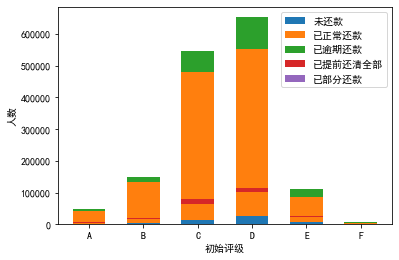

In [100]:
#绘制堆叠柱状图
plt.bar(range(len(a_level)),a_level,tick_label=labels,label='未还款',width=0.6)
plt.bar(range(len(b_level)),b_level,bottom=a_level,tick_label=labels,label='已正常还款',width=0.6)
plt.bar(range(len(c_level)),c_level,bottom=b_level,tick_label=labels,label='已逾期还款',width=0.6)
plt.bar(range(len(d_level)),d_level,bottom=c_level,tick_label=labels,label='已提前还清全部',width=0.6)
plt.bar(range(len(e_level)),e_level,bottom=d_level,tick_label=labels,label='已部分还款',width=0.6)

plt.legend()
plt.xlabel('初始评级')
plt.ylabel('人数')
plt.show()

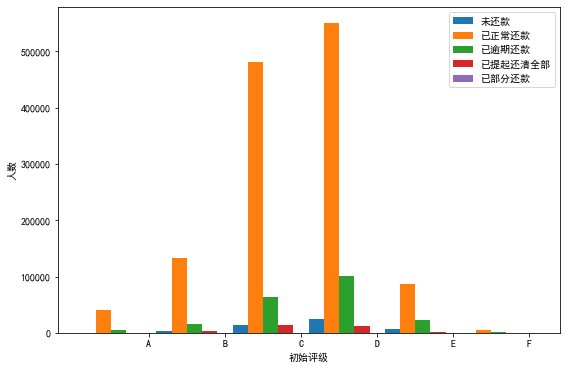

In [101]:
#绘制并列柱状图
plt.figure(figsize=(9,6))
width_0 = 0.2
plt.bar(np.arange(len(a_level)),a_level,tick_label=labels,label='未还款',width=0.2)
plt.bar(np.arange(len(b_level))+width_0,b_level,tick_label=labels,label='已正常还款',width=0.2)
plt.bar(np.arange(len(c_level))+2*width_0,c_level,tick_label=labels,label='已逾期还款',width=0.2)
plt.bar(np.arange(len(d_level))+3*width_0,d_level,tick_label=labels,label='已提起还清全部',width=0.2)
plt.bar(np.arange(len(e_level))+4*width_0,e_level,tick_label=labels,label='已部分还款',width=0.2)

plt.legend()
plt.xlabel('初始评级')
plt.ylabel('人数')
plt.show()

## 6.3 不同年龄用户的还款状态分析

In [102]:

LCLP['年龄分段'] = pd.cut(LCLP['年龄'],[15,20,25,30,35,40,45,50,55],right=True)

In [103]:
LCLP['年龄分段'].value_counts()

(25, 30]    524893
(20, 25]    467011
(30, 35]    287880
(35, 40]    134009
(40, 45]     77738
(15, 20]     63137
(45, 50]     36199
(50, 55]      9768
Name: 年龄分段, dtype: int64

In [104]:
lclp_age_pivot = pd.pivot_table(data=LCLP,columns='还款状态',index='年龄分段',
                                values='ListingId',aggfunc=np.size)

In [105]:
lclp_age_pivot

还款状态,0,1,2,3,4
年龄分段,,,,,
"(15, 20]",2297,49171,10651,997,21
"(20, 25]",13953,374360,68908,9513,277
"(25, 30]",16607,426691,69611,11693,291
"(30, 35]",9735,237006,34310,6607,222
"(35, 40]",5129,110651,15307,2806,116
"(40, 45]",3271,64255,8559,1555,98
"(45, 50]",1556,30027,3918,659,39
"(50, 55]",353,7897,1330,175,13


In [106]:
lclp_age_pivot.columns = ['未还款','已正常还款','已逾期还款','已提前还清全部','已部分还款']
lclp_age_pivot

,未还款,已正常还款,已逾期还款,已提前还清全部,已部分还款
年龄分段,,,,,
"(15, 20]",2297,49171,10651,997,21
"(20, 25]",13953,374360,68908,9513,277
"(25, 30]",16607,426691,69611,11693,291
"(30, 35]",9735,237006,34310,6607,222
"(35, 40]",5129,110651,15307,2806,116
"(40, 45]",3271,64255,8559,1555,98
"(45, 50]",1556,30027,3918,659,39
"(50, 55]",353,7897,1330,175,13


In [107]:
#绘制堆叠柱状图
a_age = lclp_age_pivot['未还款']
b_age = lclp_age_pivot['已正常还款']
c_age = lclp_age_pivot['已逾期还款']
d_age = lclp_age_pivot['已提前还清全部']
e_age = lclp_age_pivot['已部分还款']

In [108]:
labels = ['15:20','20:25','25:30','30:35','35:40','40:45','45:50','50:55']

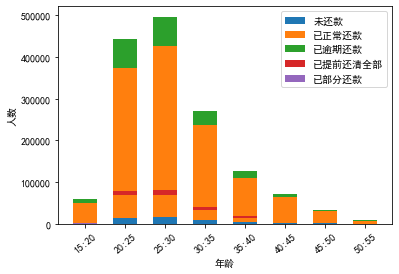

In [109]:

plt.bar(range(len(a_age)),a_age,tick_label=labels,label='未还款',width=0.6)
plt.bar(range(len(b_age)),b_age,bottom=a_age,tick_label=labels,label='已正常还款',width=0.6)
plt.bar(range(len(c_age)),c_age,bottom=b_age,tick_label=labels,label='已逾期还款',width=0.6)
plt.bar(range(len(d_age)),d_age,bottom=c_age,tick_label=labels,label='已提前还清全部',width=0.6)
plt.bar(range(len(e_age)),e_age,bottom=d_age,tick_label=labels,label='已部分还款',width=0.6)

plt.legend()
plt.xticks(rotation=40)
plt.xlabel('年龄')
plt.ylabel('人数')
plt.show()